# Day 2 Overfitting

Today we will learn abt **overfitting** :)

In [622]:
import numpy as np
import matplotlib.pyplot as plt

In [623]:
np.random.seed(10)
x = np.random.uniform(-3,3,15)
x = np.sort(x)

In [624]:
x

array([-2.9763104 , -2.8754883 , -2.46996111, -1.98533498, -1.81162281,
       -1.65122013, -0.00895793,  0.07315358,  0.80188941,  1.11215891,
        1.4928233 ,  1.56318427,  1.62792386,  1.87572577,  2.72036008])

In [625]:
def sin(x):
  return np.sin(x)

Text(0.5, 1.0, 'sin(x)')

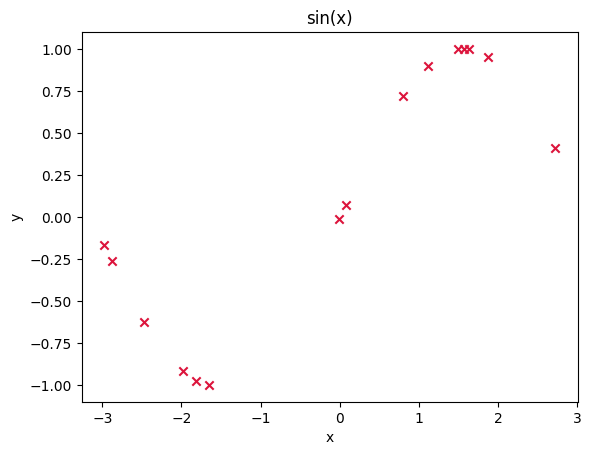

In [626]:
# plot a scatter plot
plt.scatter(x, sin(x), color ="crimson", marker="x")

plt.xlabel("x")
plt.ylabel("y")

# add a title
plt.title("sin(x)")

In [627]:
def noisy_sin(x, noise_level):
  return sin(x) + np.random.uniform(-noise_level, noise_level, x.shape)

In [628]:
import torch
dtype =torch.float

generate numbers and do normalisation

In [629]:
y_observed = noisy_sin(x , .4)
x_observed = x

y_observed = torch.tensor(y_observed, dtype=dtype)
x_observed = torch.tensor(x_observed, dtype=dtype)

mean = x_observed.mean()
std = x_observed.std()
x_observed = (x_observed-mean ) /std # normalize to a mean of 0 and an std of 1

Text(0.5, 1.0, 'sin(x)')

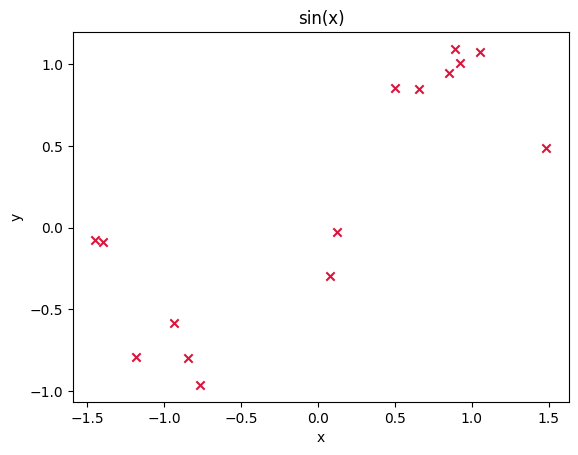

In [630]:
plt.scatter(x_observed, y_observed, color ="crimson", marker="x")

plt.xlabel("x")
plt.ylabel("y")

plt.title("sin(x)")

In [631]:
class Linear_reg:
  def __init__(self, m, b):
    self.m = torch.tensor(m, requires_grad=True, dtype=dtype)
    self.b = torch.tensor(b, requires_grad=True, dtype=dtype)
  def forward(self, x):
    return self.m * x + self.b
  def ssr(self, y, y_hat):
    return torch.sum((y-y_hat)**2)

In [632]:
epochs = 5000
step_size = 1e-3 # equal to 0.001 scientific notation

model = Linear_reg(m=0, b= 0)

for i in range(epochs):

  # forward pass
  y_hat = model.forward(x_observed)

  #calc loss
  loss = model.ssr(y_observed, y_hat)
  loss.backward()

  #update parameters
  with torch.no_grad():
    model.m-= step_size * model.m.grad
    model.b -=step_size * model.b.grad

  #zero out gradients
  model.m.grad.zero_()
  model.b.grad.zero_()

  # print the values for understanding
  if i%100==0:
    print(f'{i},\t{loss.item():.4f},\t{model.b.item():.4f},\t{model.m.item():.4f}')

0,	8.5857,	0.0054,	0.0173
100,	2.7783,	0.1719,	0.5825
200,	2.7590,	0.1798,	0.6155
300,	2.7589,	0.1802,	0.6174
400,	2.7589,	0.1802,	0.6176
500,	2.7589,	0.1802,	0.6176
600,	2.7589,	0.1802,	0.6176
700,	2.7589,	0.1802,	0.6176
800,	2.7589,	0.1802,	0.6176
900,	2.7589,	0.1802,	0.6176
1000,	2.7589,	0.1802,	0.6176
1100,	2.7589,	0.1802,	0.6176
1200,	2.7589,	0.1802,	0.6176
1300,	2.7589,	0.1802,	0.6176
1400,	2.7589,	0.1802,	0.6176
1500,	2.7589,	0.1802,	0.6176
1600,	2.7589,	0.1802,	0.6176
1700,	2.7589,	0.1802,	0.6176
1800,	2.7589,	0.1802,	0.6176
1900,	2.7589,	0.1802,	0.6176
2000,	2.7589,	0.1802,	0.6176
2100,	2.7589,	0.1802,	0.6176
2200,	2.7589,	0.1802,	0.6176
2300,	2.7589,	0.1802,	0.6176
2400,	2.7589,	0.1802,	0.6176
2500,	2.7589,	0.1802,	0.6176
2600,	2.7589,	0.1802,	0.6176
2700,	2.7589,	0.1802,	0.6176
2800,	2.7589,	0.1802,	0.6176
2900,	2.7589,	0.1802,	0.6176
3000,	2.7589,	0.1802,	0.6176
3100,	2.7589,	0.1802,	0.6176
3200,	2.7589,	0.1802,	0.6176
3300,	2.7589,	0.1802,	0.6176
3400,	2.7589,	0.1802,	0.61

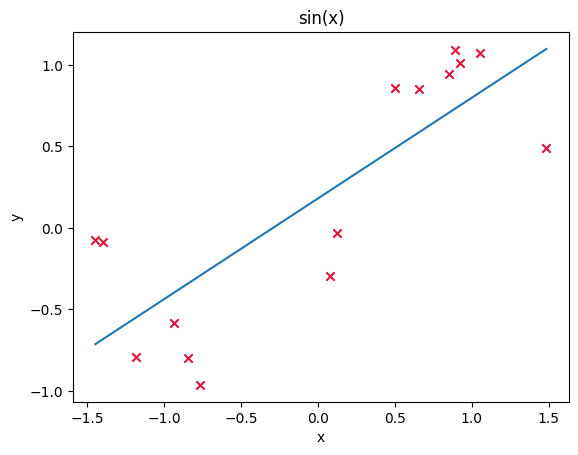

In [633]:
with torch.no_grad():

  x_min = x_observed.min().item()
  x_max = x_observed.max().item()

  x_display = torch.tensor(np.linspace(x_min,x_max,100))

  y_display = model.forward(x_display)

  #plot line of the model
  plt.plot(x_display, y_display)
  #plot data
  plt.scatter(x_observed, y_observed, color ="crimson", marker="x")

  plt.xlabel("x")
  plt.ylabel("y")

  plt.title("sin(x)")


In [634]:
class SecondOrderPolynomial:
  def __init__(self, w1, w2, b):
    self.w1 = torch.tensor(w1, requires_grad=True, dtype=dtype)
    self.w2 = torch.tensor(w2, requires_grad=True, dtype=dtype)
    self.b = torch.tensor(b, requires_grad=True, dtype=dtype)
  def forward(self, x):
    return self.w1 * x +self.w2*(x**2)+ self.b
  def loss(self, y, y_hat):
    return torch.mean((y-y_hat)**2)

In [635]:
epochs = 5000
step_size = 1e-3 # equal to 0.001 scientific notation

model = SecondOrderPolynomial(
    w1 = np.random.uniform(-.1,.1),
    w2 = np.random.uniform(-.1,.1),
    b = np.random.uniform(-.1,.1)
)

optimizer = torch.optim.SGD([model.w1, model.w2, model.b], lr=step_size)

for i in range(epochs):

  # forward pass
  y_hat = model.forward(x_observed)

  #calc loss
  loss = model.loss(y_observed, y_hat)
  loss.backward()

  #update parameters
  optimizer.step()

  #zero out gradients
  optimizer.zero_grad()

  # print the values for understanding
  if i%100==0:
    print(f'{i},\t{loss.item():.4f},\t{model.b.item():.4f},\t{model.w1.item():.4f},\t{model.w2.item():.4f}')

0,	0.4820,	0.0819,	0.0621,	0.0045
100,	0.3871,	0.0978,	0.1571,	0.0173
200,	0.3219,	0.1090,	0.2362,	0.0273
300,	0.2770,	0.1166,	0.3020,	0.0353
400,	0.2461,	0.1215,	0.3569,	0.0421
500,	0.2246,	0.1245,	0.4026,	0.0479
600,	0.2098,	0.1261,	0.4406,	0.0532
700,	0.1994,	0.1265,	0.4723,	0.0580
800,	0.1922,	0.1260,	0.4988,	0.0624
900,	0.1872,	0.1249,	0.5208,	0.0666
1000,	0.1836,	0.1233,	0.5392,	0.0706
1100,	0.1810,	0.1214,	0.5546,	0.0744
1200,	0.1792,	0.1191,	0.5674,	0.0780
1300,	0.1778,	0.1167,	0.5782,	0.0815
1400,	0.1768,	0.1141,	0.5872,	0.0848
1500,	0.1761,	0.1115,	0.5948,	0.0880
1600,	0.1755,	0.1088,	0.6012,	0.0911
1700,	0.1750,	0.1061,	0.6065,	0.0941
1800,	0.1747,	0.1034,	0.6111,	0.0969
1900,	0.1744,	0.1007,	0.6149,	0.0997
2000,	0.1741,	0.0980,	0.6182,	0.1023
2100,	0.1739,	0.0954,	0.6209,	0.1048
2200,	0.1737,	0.0928,	0.6233,	0.1073
2300,	0.1736,	0.0903,	0.6254,	0.1096
2400,	0.1734,	0.0879,	0.6271,	0.1118
2500,	0.1733,	0.0855,	0.6286,	0.1140
2600,	0.1732,	0.0832,	0.6299,	0.1161
2700,	0.1731,

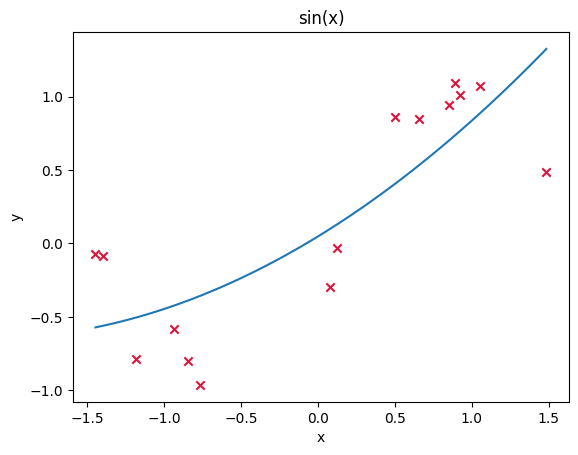

In [636]:
with torch.no_grad():

  x_min = x_observed.min().item()
  x_max = x_observed.max().item()

  x_display = torch.tensor(np.linspace(x_min,x_max,100))

  y_display = model.forward(x_display)

  #plot line of the model
  plt.plot(x_display, y_display)
  #plot data
  plt.scatter(x_observed, y_observed, color ="crimson", marker="x")

  plt.xlabel("x")
  plt.ylabel("y")

  plt.title("sin(x)")


In this case the model does not fit the training set well, this is considered to be **underfitting**, this is also called having **high bias**

In [637]:
class ThirdOrderPolynomial:
  def __init__(self, w1, w2, w3, b):
    self.w1 = torch.tensor(w1, requires_grad=True, dtype=dtype)
    self.w2 = torch.tensor(w2, requires_grad=True, dtype=dtype)

    self.w3 = torch.tensor(w3, requires_grad=True, dtype=dtype)
    self.b = torch.tensor(b, requires_grad=True, dtype=dtype)
  def forward(self, x):
    return self.w1 * x +self.w2*(x**2)+ + self.w3*(x**3)+ self.b
  def loss(self, y, y_hat):
    return torch.mean((y-y_hat)**2)

In [638]:
epochs = 5000
step_size = 1e-3 # equal to 0.001 scientific notation

model = ThirdOrderPolynomial(
    w1 = np.random.uniform(-.1,.1),
    w2 = np.random.uniform(-.1,.1),
    w3 = np.random.uniform(-.1,.1),
    b = np.random.uniform(-.1,.1)
)

optimizer = torch.optim.SGD([model.w1, model.w2, model.w3, model.b], lr=step_size)

for i in range(epochs):

  # forward pass
  y_hat = model.forward(x_observed)

  #calc loss
  loss = model.loss(y_observed, y_hat)
  loss.backward()

  #update parameters
  optimizer.step()

  #zero out gradients
  optimizer.zero_grad()

  # print the values for understanding
  if i%100==0:
    print(f'{i},\t{loss.item():.4f},\t{model.b.item():.4f},\t{model.w1.item():.4f},\t{model.w2.item():.4f}, \t{model.w3.item():.4f}')

0,	0.7425,	-0.0765,	-0.0349,	-0.0813, 	-0.0385
100,	0.4698,	-0.0206,	0.0710,	-0.0274, 	0.0578
200,	0.3617,	0.0192,	0.1435,	0.0124, 	0.1038
300,	0.3127,	0.0469,	0.1971,	0.0409, 	0.1224
400,	0.2865,	0.0658,	0.2398,	0.0608, 	0.1259
500,	0.2696,	0.0784,	0.2760,	0.0744, 	0.1210
600,	0.2567,	0.0866,	0.3081,	0.0837, 	0.1115
700,	0.2459,	0.0918,	0.3377,	0.0899, 	0.0994
800,	0.2361,	0.0948,	0.3654,	0.0940, 	0.0861
900,	0.2270,	0.0963,	0.3919,	0.0968, 	0.0720
1000,	0.2185,	0.0968,	0.4173,	0.0986, 	0.0577
1100,	0.2103,	0.0965,	0.4420,	0.0998, 	0.0434
1200,	0.2025,	0.0957,	0.4659,	0.1007, 	0.0292
1300,	0.1951,	0.0945,	0.4892,	0.1013, 	0.0151
1400,	0.1880,	0.0931,	0.5120,	0.1018, 	0.0013
1500,	0.1812,	0.0915,	0.5342,	0.1023, 	-0.0123
1600,	0.1746,	0.0897,	0.5559,	0.1027, 	-0.0257
1700,	0.1684,	0.0878,	0.5771,	0.1031, 	-0.0387
1800,	0.1624,	0.0858,	0.5979,	0.1036, 	-0.0515
1900,	0.1567,	0.0838,	0.6182,	0.1041, 	-0.0640
2000,	0.1512,	0.0816,	0.6381,	0.1047, 	-0.0763
2100,	0.1459,	0.0795,	0.6575,	0.10

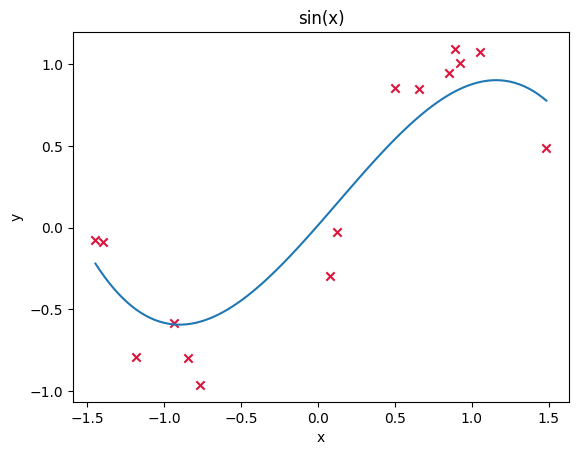

In [639]:
with torch.no_grad():

  x_min = x_observed.min().item()
  x_max = x_observed.max().item()

  x_display = torch.tensor(np.linspace(x_min,x_max,100))

  y_display = model.forward(x_display)

  #plot line of the model
  plt.plot(x_display, y_display)
  #plot data
  plt.scatter(x_observed, y_observed, color ="crimson", marker="x")

  plt.xlabel("x")
  plt.ylabel("y")

  plt.title("sin(x)")


In this case the model fits the training set pretty well, and should be good for generalization

In [640]:
class AnyOrderPolynomial:
  def __init__(self, degree):
    self.degree= degree
    #the weights tensor will have size (degree+1, 1) to hold
    #coefficients for x^0, x^1, ...., x^deg
    weights = np.random.uniform(-.1, .1, size=(degree+1, 1))
    self.weights = torch.tensor(weights, dtype=dtype, requires_grad=True)
  def forward(self, x):
    if x.dim()==1:
      x= x.view(-1,1)

    # we create a matrix where each column is x raised to a power (0 to degree)
    powers = torch.arange(self.degree+1, dtype=dtype)
    x_poly = x.pow(powers)

    output = x_poly @self.weights
    return output.flatten()
  def loss(self, y, y_hat):
    return torch.mean((y-y_hat)**2)

In [641]:
a = torch.tensor([[0,1,2,3]])
print(a)
print(a.flatten())

tensor([[0, 1, 2, 3]])
tensor([0, 1, 2, 3])


In [642]:
test_model = AnyOrderPolynomial(3)

print(test_model.weights)

output = test_model.forward(x_observed)
print(x_observed)
print(output)

tensor([[ 0.0657],
        [-0.0906],
        [ 0.0253],
        [ 0.0095]], requires_grad=True)
tensor([-1.4452, -1.3934, -1.1847, -0.9353, -0.8460, -0.7634,  0.0815,  0.1238,
         0.4987,  0.6584,  0.8542,  0.8904,  0.9238,  1.0513,  1.4858])
tensor([0.2207, 0.2153, 0.1927, 0.1648, 0.1547, 0.1454, 0.0585, 0.0549, 0.0280,
        0.0197, 0.0127, 0.0118, 0.0111, 0.0094, 0.0181],
       grad_fn=<ViewBackward0>)


In [643]:
epochs = 15000
step_size = 1e-3 # equal to 0.001 scientific notation

model = AnyOrderPolynomial(15
)

optimizer = torch.optim.Adam([model.weights], lr=step_size)

for i in range(epochs):

  # forward pass
  y_hat = model.forward(x_observed)

  #calc loss
  loss = model.loss(y_observed, y_hat)
  loss.backward()

  #update parameters
  optimizer.step()

  #zero out gradients
  optimizer.zero_grad()

  # print the values for understanding
  if i%100==0:
    print(f'{i},\t{loss.item():.4f}')

0,	168.3455
100,	0.9723
200,	0.9046
300,	0.8272
400,	0.7454
500,	0.6634
600,	0.5844
700,	0.5103
800,	0.4423
900,	0.3812
1000,	0.3271
1100,	0.2798
1200,	0.2389
1300,	0.2040
1400,	0.1745
1500,	0.1496
1600,	0.1287
1700,	0.1114
1800,	0.0970
1900,	0.0852
2000,	0.0754
2100,	0.0674
2200,	0.0609
2300,	0.0555
2400,	0.0512
2500,	0.0477
2600,	0.0448
2700,	0.0424
2800,	0.0405
2900,	0.0388
3000,	0.0374
3100,	0.0362
3200,	0.0352
3300,	0.0343
3400,	0.0334
3500,	0.0326
3600,	0.0319
3700,	0.0313
3800,	0.0307
3900,	0.0301
4000,	0.0296
4100,	0.0291
4200,	0.0286
4300,	0.0282
4400,	0.0278
4500,	0.0274
4600,	0.0270
4700,	0.0267
4800,	0.0264
4900,	0.0261
5000,	0.0258
5100,	0.0255
5200,	0.0252
5300,	0.0249
5400,	0.0247
5500,	0.0244
5600,	0.0242
5700,	0.0239
5800,	0.0237
5900,	0.0235
6000,	0.0232
6100,	0.0230
6200,	0.0228
6300,	0.0226
6400,	0.0224
6500,	0.0222
6600,	0.0220
6700,	0.0218
6800,	0.0217
6900,	0.0215
7000,	0.0213
7100,	0.0212
7200,	0.0210
7300,	0.0209
7400,	0.0208
7500,	0.0206
7600,	0.0205
7700,	0.0

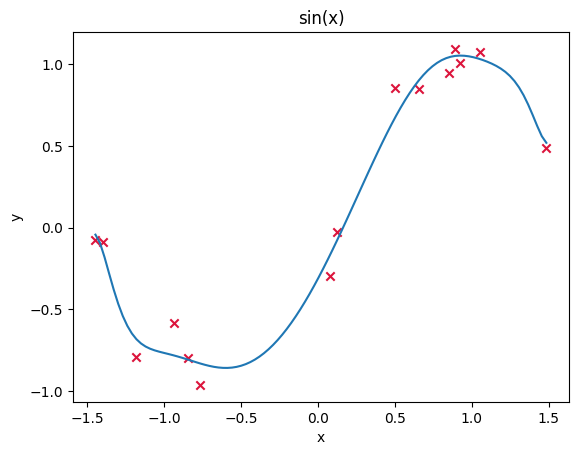

In [644]:
with torch.no_grad():

  x_min = x_observed.min().item()
  x_max = x_observed.max().item()

  x_display = torch.tensor(np.linspace(x_min,x_max,100), dtype=dtype)

  y_display = model.forward(x_display)

  #plot line of the model
  plt.plot(x_display, y_display)
  #plot data
  plt.scatter(x_observed, y_observed, color ="crimson", marker="x")

  plt.xlabel("x")
  plt.ylabel("y")

  plt.title("sin(x)")


In this case the model does in fit the training set very well this is considered to be **overfitting** this is also called having **high variance**, you can think of it as the model having a low amount of assumptions or priors

The tradeoff between the bias and variance is called the **bias-variance tradeoff**

## Training, Validation, and Test Datasets

In practice we often want to seperate out our data into training, validation, and test sets. You can also do just the training and the test set if you have a smaller dataset, depending how much you care about data leakage. If you only use the test set you can overfit to the test set if you constantly retrain.

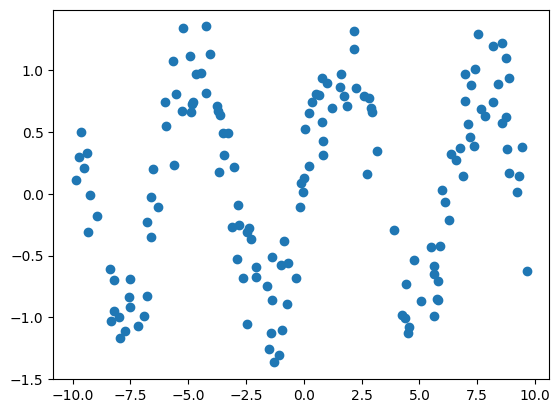

In [715]:
# generate data
x = np.random.uniform(-10,10,150)
x = np.sort(x)
y = noisy_sin(x,.5)

plt.scatter(x,y)
plt.show()

#create shuffle indices
indices = np.arange(len(x))
np.random.shuffle(indices)

#split proportions
n = len(x)
train_idx = indices[:int(.8*n)]
val_idx = indices[int(.8*n):int(.9*n)]
test_idx = indices[int(.9*n):]

#split the data
x_train = x[train_idx]
x_val = x[val_idx]
x_test = x[test_idx]

#convert to tensors
x_trainset = torch.tensor(x_train, dtype=dtype)
x_valset = torch.tensor(x_val, dtype=dtype)
x_testset = torch.tensor(x_test, dtype=dtype)

y_trainset = torch.tensor(y[train_idx], dtype=dtype)
y_valset = torch.tensor(y[val_idx], dtype=dtype)
y_testset = torch.tensor(y[test_idx], dtype=dtype)

#normalize x using mean/std (important!)
mean=x_trainset.mean()
std=x_trainset.std()

x_trainset = (x_trainset-mean)/std
x_valset = (x_valset-mean)/std
x_testset = (x_testset-mean)/std

In [716]:
epochs = 15000
step_size = 1e-3 # equal to 0.001 scientific notation

model = AnyOrderPolynomial(7
)

optimizer = torch.optim.Adam([model.weights], lr=step_size)

train_loss_hist=[]
val_loss_hist = []

for i in range(epochs):

  # forward pass
  y_hat = model.forward(x_trainset)

  #calc loss
  loss = model.loss(y_trainset, y_hat)
  loss.backward()

  #record loss
  train_loss_hist.append(loss.item())
  #update parameters
  optimizer.step()

  #zero out gradients
  optimizer.zero_grad()

  #test on validation dataset
  with torch.no_grad():
    y_hat = model.forward(x_valset)

    val_loss = model.loss(y_valset, y_hat)

    #storing val loss
    val_loss_hist.append(val_loss.item())


  # print the values for understanding
  if i%100==0:
    print(f'{i},\t{loss.item():.4f}, \t{val_loss.item():.4f}')

0,	1.3197, 	1.4611
100,	0.4985, 	0.6128
200,	0.4932, 	0.6235
300,	0.4877, 	0.6178
400,	0.4819, 	0.6115
500,	0.4759, 	0.6050
600,	0.4700, 	0.5984
700,	0.4642, 	0.5921
800,	0.4587, 	0.5862
900,	0.4535, 	0.5807
1000,	0.4488, 	0.5757
1100,	0.4445, 	0.5712
1200,	0.4406, 	0.5672
1300,	0.4371, 	0.5637
1400,	0.4340, 	0.5606
1500,	0.4313, 	0.5578
1600,	0.4288, 	0.5554
1700,	0.4265, 	0.5531
1800,	0.4245, 	0.5510
1900,	0.4226, 	0.5490
2000,	0.4208, 	0.5470
2100,	0.4191, 	0.5450
2200,	0.4174, 	0.5430
2300,	0.4157, 	0.5409
2400,	0.4141, 	0.5387
2500,	0.4124, 	0.5365
2600,	0.4106, 	0.5341
2700,	0.4089, 	0.5315
2800,	0.4070, 	0.5289
2900,	0.4051, 	0.5261
3000,	0.4032, 	0.5232
3100,	0.4011, 	0.5202
3200,	0.3991, 	0.5171
3300,	0.3969, 	0.5139
3400,	0.3947, 	0.5105
3500,	0.3924, 	0.5070
3600,	0.3901, 	0.5035
3700,	0.3877, 	0.4998
3800,	0.3853, 	0.4960
3900,	0.3828, 	0.4922
4000,	0.3803, 	0.4882
4100,	0.3777, 	0.4842
4200,	0.3750, 	0.4800
4300,	0.3724, 	0.4758
4400,	0.3697, 	0.4716
4500,	0.3669, 	0.4672


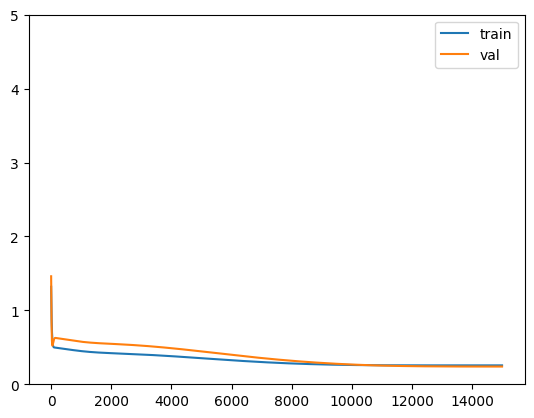

In [717]:
plt.plot(train_loss_hist, label="train")
plt.plot(val_loss_hist, label="val")

plt.ylim(0,5)
plt.legend()

In [718]:
with torch.no_grad():
  y_hat = model.forward(x_testset)
  test_loss = model.loss(y_testset, y_hat)
  print(f'The test loss is {test_loss}')

The test loss is 0.2354583740234375


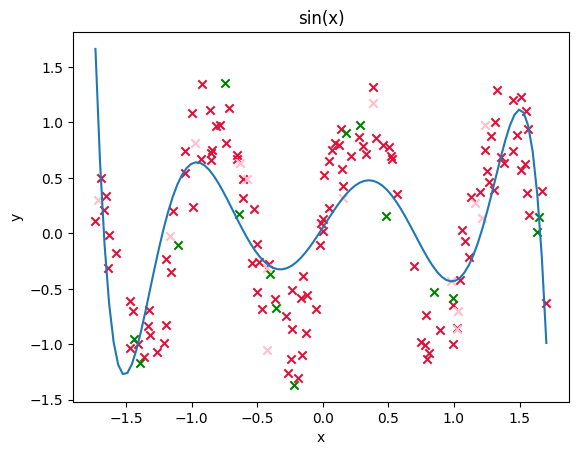

In [719]:
with torch.no_grad():

  x_min = x_trainset.min().item()
  x_max = x_trainset.max().item()

  x_display = torch.tensor(np.linspace(x_min,x_max,100), dtype=dtype)

  y_display = model.forward(x_display)

  #plot line of the model
  plt.plot(x_display, y_display)
  #plot data
  plt.scatter(x_trainset, y_trainset, color ="crimson", marker="x")
  plt.scatter(x_valset, y_valset, color ="green", marker="x")
  plt.scatter(x_testset, y_testset, color ="pink", marker="x")

  plt.xlabel("x")
  plt.ylabel("y")

  plt.title("sin(x)")

Techniques to deal with overfitting



*   More training data
*   Reduce model complexity
*   Early stop
*   Regularization



In [708]:
class RegularizedPolynomial(AnyOrderPolynomial):
  def __init__(self, degree, lam):
    super().__init__(degree)
    self.lam = lam

  def loss(self, y, y_hat):
    l2_penalty = torch.sum(self.weights[1:] **2)
    mse = torch.mean((y-y_hat)**2)
    return mse+ self.lam*l2_penalty

In [709]:
epochs = 15000
step_size = 1e-2 # equal to 0.001 scientific notation

model = RegularizedPolynomial(7,0
)

optimizer = torch.optim.Adam([model.weights], lr=step_size)

train_loss_hist=[]
val_loss_hist = []

for i in range(epochs):

  # forward pass
  y_hat = model.forward(x_trainset)

  #calc loss
  loss = model.loss(y_trainset, y_hat)
  loss.backward()

  #record loss
  train_loss_hist.append(loss.item())
  #update parameters
  optimizer.step()

  #zero out gradients
  optimizer.zero_grad()

  #test on validation dataset
  with torch.no_grad():
    y_hat = model.forward(x_valset)

    val_loss = model.loss(y_valset, y_hat)

    #storing val loss
    val_loss_hist.append(val_loss.item())


  # print the values for understanding
  if i%100==0:
    print(f'{i},\t{loss.item():.4f}, \t{val_loss.item():.4f}')

0,	5.7050, 	14.2765
100,	0.5496, 	0.2970
200,	0.5305, 	0.2639
300,	0.5138, 	0.2376
400,	0.5005, 	0.2162
500,	0.4908, 	0.2005
600,	0.4840, 	0.1896
700,	0.4789, 	0.1820
800,	0.4749, 	0.1764
900,	0.4713, 	0.1719
1000,	0.4679, 	0.1679
1100,	0.4644, 	0.1641
1200,	0.4608, 	0.1604
1300,	0.4571, 	0.1566
1400,	0.4533, 	0.1529
1500,	0.4493, 	0.1493
1600,	0.4453, 	0.1456
1700,	0.4412, 	0.1421
1800,	0.4369, 	0.1387
1900,	0.4327, 	0.1354
2000,	0.4283, 	0.1322
2100,	0.4239, 	0.1293
2200,	0.4195, 	0.1265
2300,	0.4150, 	0.1240
2400,	0.4105, 	0.1218
2500,	0.4060, 	0.1198
2600,	0.4015, 	0.1182
2700,	0.3970, 	0.1168
2800,	0.3925, 	0.1159
2900,	0.3880, 	0.1153
3000,	0.3835, 	0.1151
3100,	0.3791, 	0.1153
3200,	0.3748, 	0.1159
3300,	0.3705, 	0.1170
3400,	0.3662, 	0.1186
3500,	0.3621, 	0.1207
3600,	0.3580, 	0.1232
3700,	0.3540, 	0.1263
3800,	0.3502, 	0.1299
3900,	0.3465, 	0.1340
4000,	0.3429, 	0.1386
4100,	0.3395, 	0.1437
4200,	0.3362, 	0.1493
4300,	0.3331, 	0.1554
4400,	0.3302, 	0.1619
4500,	0.3275, 	0.1689

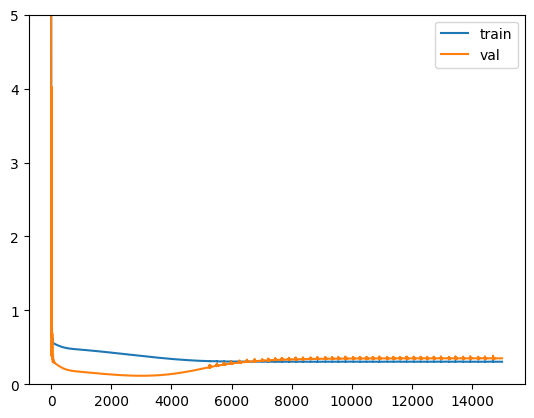

In [710]:
plt.plot(train_loss_hist, label="train")
plt.plot(val_loss_hist, label="val")

plt.ylim(0,5)
plt.legend()

In [711]:
with torch.no_grad():
  y_hat = model.forward(x_testset)
  test_loss = model.loss(y_testset, y_hat)
  print(f'The test loss is {test_loss}')

The test loss is 0.4379257559776306


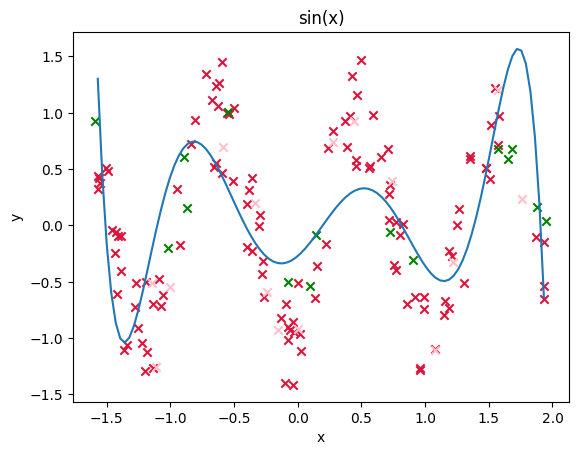

In [712]:
with torch.no_grad():

  x_min = x_trainset.min().item()
  x_max = x_trainset.max().item()

  x_display = torch.tensor(np.linspace(x_min,x_max,100), dtype=dtype)

  y_display = model.forward(x_display)

  #plot line of the model
  plt.plot(x_display, y_display)
  #plot data
  plt.scatter(x_trainset, y_trainset, color ="crimson", marker="x")
  plt.scatter(x_valset, y_valset, color ="green", marker="x")
  plt.scatter(x_testset, y_testset, color ="pink", marker="x")

  plt.xlabel("x")
  plt.ylabel("y")

  plt.title("sin(x)")